In [1]:
import numpy as np
import math
import pandas as pd
import tensorflow as tf
# import kerastuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [15]:
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from sklearn.linear_model import SGDRegressor
from tensorflow import keras

In [3]:
train_fea = pd.read_csv('./train_features.csv')
train_labels = pd.read_csv('./train_labels.csv')
pretrain_fea=pd.read_csv('./pretrain_features.csv')
pretrain_labels=pd.read_csv('./pretrain_labels.csv')

In [4]:
train_labels.iloc[:,1]

0     2.052872
1     1.325530
2     1.837294
3     1.388601
4     0.991851
        ...   
95    1.791795
96    1.115060
97    2.087200
98    1.622947
99    1.739702
Name: homo_lumo_gap, Length: 100, dtype: float64

In [5]:
train_fea1=train_fea.iloc[:,2:]
train_fea1

,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,feature_0008,feature_0009,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
n_inputs = pretrain_fea.shape[1]-2
pretrain_labels.iloc[:,1]

0       -3.111521
1       -3.219118
2       -3.114145
3       -3.161867
4       -3.687744
           ...   
49995   -3.531096
49996   -3.726209
49997   -2.701048
49998   -3.516759
49999   -3.410109
Name: lumo_energy, Length: 50000, dtype: float64

In [8]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(pretrain_fea.iloc[:,2:], pretrain_labels.iloc[:,1], test_size=0.2, random_state=1)
# scale data
# t = MinMaxScaler()
# t.fit(X_train)
# X_train = t.transform(X_train)
# X_test = t.transform(X_test)

In [9]:
X_train.shape

(40000, 1000)

In [ ]:
# class AutoEncoders(Model):

#   def __init__(self, output_units):

#     super().__init__()
#     self.encoder = Sequential(
#         [
#           Dense(512, activation="relu"),
#           Dense(216, activation="relu")
          
#         ]
#     )
# self.decoder = Sequential(
#         [
#           Dense(512, activation="relu"),
#           Dense(32, activation="relu"),
#           Dense(output_units, activation="sigmoid")
#         ]
#     )

# def call(self, inputs):

#   encoded = self.encoder(inputs)
#   decoded = self.decoder(encoded)
#   return decoded

# auto_encoder = AutoEncoders(len(x_train_scaled.columns))

# auto_encoder.compile(
#     loss='mae',
#     metrics=['mae'],
#     optimizer='adam'
# )

# history = auto_encoder.fit(
#     x_train_scaled, 
#     x_train_scaled, 
#     epochs=15, 
#     batch_size=32, 
#     validation_data=(x_test_scaled, x_test_scaled)
# )

In [31]:
# define encoder 1
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs)(visible)
e = ReLU()(e)
e = BatchNormalization()(e)
# define layer1
layer1 = Dense(1024)(e)
layer1 = ReLU()(layer1)
layer1 = BatchNormalization()(layer1)

In [32]:

layer2 = Dense(512)(layer1)
layer2 = ReLU()(layer2)
layer2 = BatchNormalization()(layer2)


layer3=Dense(256)(layer2)
layer3=BatchNormalization()(layer3)
layer3 = ReLU()(layer3)

output = Dense(1, activation='linear')(layer3)
# define mlp model
model = Model(inputs=visible, outputs=output)
# compile MLP model
#model.compile(optimizer='adam', loss='mse')

In [36]:
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='mse', optimizer=opt)

In [135]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=1, validation_data=(X_test,y_test))

Epoch 1/3
1250/1250 [==============================] - 23s 18ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 2/3
1250/1250 [==============================] - 27s 22ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 3/3
1250/1250 [==============================] - 25s 20ms/step - loss: 0.0010 - val_loss: 0.0023


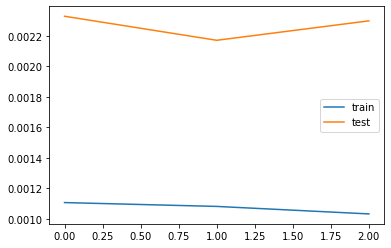

In [136]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [137]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=layer3)
#plot_model(encoder, 'encoder.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [138]:
encoder = load_model('encoder.h5')

In [139]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_fea1, train_labels.iloc[:,1], test_size=0.1, random_state=1)

In [142]:
# encode the train data
train_encode = encoder.predict(X_train1)
# encode the test data
test_encode = encoder.predict(X_test1)

In [143]:
train_encode.shape

(90, 256)

In [126]:
model_1 = SVR()
model_1.fit(train_encode, y_train1)

SVR()

In [76]:
#model_2=SGDRegressor()
#model_2.fit(train_encode, y_train1)

SGDRegressor()

In [109]:
yhat = model_1.predict(test_encode)

In [112]:
yhat.shape

(10,)

In [110]:
score = mean_absolute_error(y_test1, yhat)
print(score)

0.0971621734911637


In [112]:
test_fea = pd.read_csv('./test_features.csv')

In [113]:
test_fea1=test_fea.iloc[:,2:]

In [128]:
test_final = encoder.predict(test_fea1)

In [115]:
test_final.shape

(10000, 256)

In [129]:
result = model_1.predict(test_final)

In [125]:
result.shape

(10000,)

In [117]:
sample = pd.read_csv('./sample.csv')

In [118]:
sample

,Id,y
0,50100,0.0
1,50101,0.0
2,50102,0.0
3,50103,0.0
4,50104,0.0
...,...,...
9995,60095,0.0
9996,60096,0.0
9997,60097,0.0
9998,60098,0.0


In [119]:
sample=sample.to_numpy()

In [130]:
sample[:,1]=result

In [131]:
sample[:,1]

array([1.87497673, 2.11022559, 1.69212795, ..., 1.37683586, 2.08526286,
       1.36871765])

In [132]:
df = pd.DataFrame(sample,columns = ['Id','y'])

In [133]:
df

,Id,y
0,50100.0,1.874977
1,50101.0,2.110226
2,50102.0,1.692128
3,50103.0,2.295890
4,50104.0,1.763925
...,...,...
9995,60095.0,2.281085
9996,60096.0,1.624010
9997,60097.0,1.376836
9998,60098.0,2.085263


In [134]:
df.to_csv('rnm3.csv', index=False)